# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

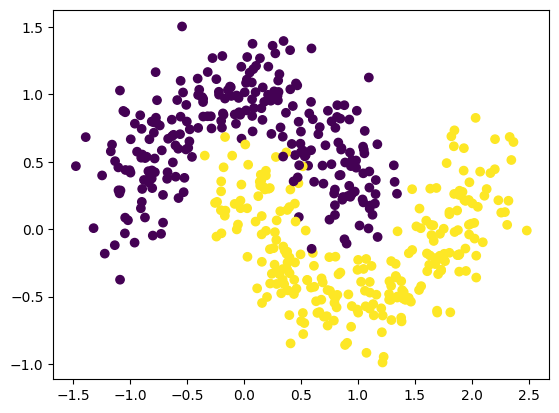

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, random_state=1)
svm = SVC(kernel='linear', max_iter=500, probability=True, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.35, random_state=1)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

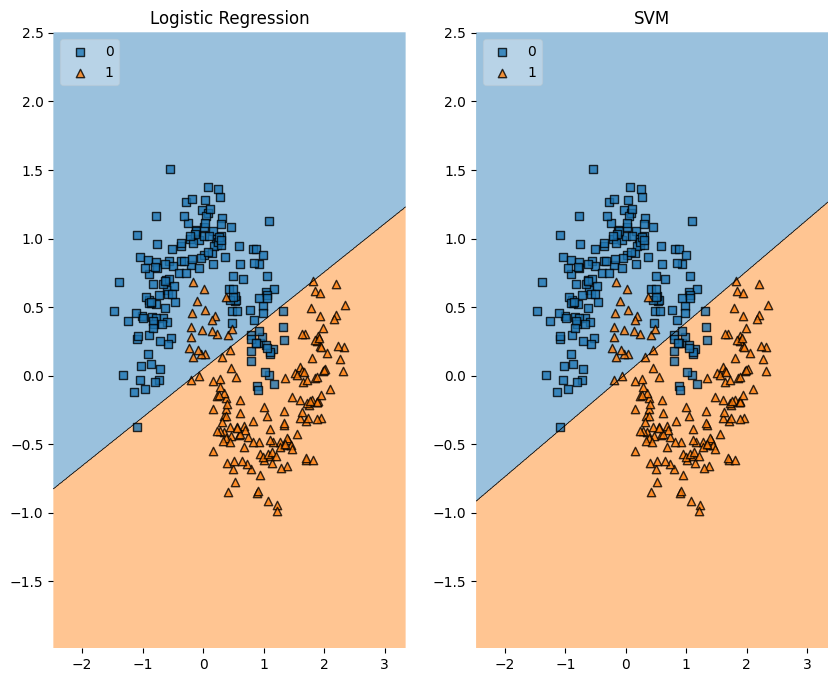

In [5]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10, 8))
for clf, lab, grd in zip([lr, svm],
                         ['Logistic Regression', 'SVM'],
                         [(0, 0), (0, 1)]):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

In [106]:
acc = accuracy_score(lr.predict(X_test), y_test)
print(f'accuracy for logistic regression : {acc}')

accuracy for logistic regression : 0.8342857142857143


In [8]:
acc = accuracy_score(svm.predict(X_test), y_test)
print(f'accuracy for SVM : {acc}')

accuracy for SVM : 0.8228571428571428


__Conclusion__: From the above plots, we conclude that logistic regression model and SVM with linear kernel are not suitable for this problem.

## 1.2 Kernel trick

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [154]:
svm_poly = SVC(kernel='poly', probability=True,random_state=1)
svm_rbf = SVC(kernel='rbf',  random_state=1)
svm_sigmoid = SVC(kernel='sigmoid', random_state=1)

In [155]:
from sklearn.model_selection import GridSearchCV

In [231]:
param_poly = {'C': [1, 10], 'degree': list(range(2, 7)), 'coef0': np.linspace(0, 10, 11)}

gs_svm_poly = GridSearchCV(svm_poly, param_poly)
gs_svm_poly.fit(X_train, y_train)

GridSearchCV(estimator=SVC(coef0=1, kernel='poly', probability=True,
                           random_state=1),
             param_grid={'C': [1, 10],
                         'coef0': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'degree': [2, 3, 4, 5, 6]})

In [232]:
print(f"Best: {gs_svm_poly.best_score_} using {gs_svm_poly.best_params_}")

Best: 0.9815384615384616 using {'C': 1, 'coef0': 1.0, 'degree': 4}


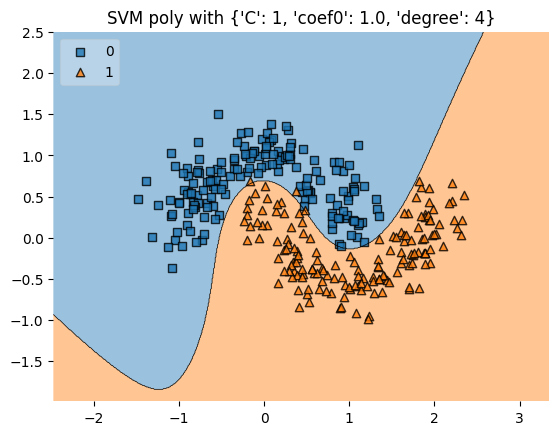

In [233]:
plot_decision_regions(X=X_train, y=y_train, clf=gs_svm_poly, legend=2)
plt.title('SVM poly' + f' with {gs_svm_poly.best_params_}')
plt.show()

In [192]:
acc = accuracy_score(gs_svm_poly.predict(X_test), y_test)
print(f'accuracy for SVM poly : {acc}')

accuracy for SVM poly : 0.96


In [193]:
param_rbf = {'C': [0.1,1, 10, 100], 'gamma': [0.1,0.01,0.001]}


gs_svm_rbf = GridSearchCV(svm_rbf, param_rbf)
gs_svm_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]})

In [174]:
print(f"Best: {gs_svm_rbf.best_score_} using {gs_svm_rbf.best_params_}")

Best: 0.9600000000000002 using {'C': 100, 'gamma': 0.1}


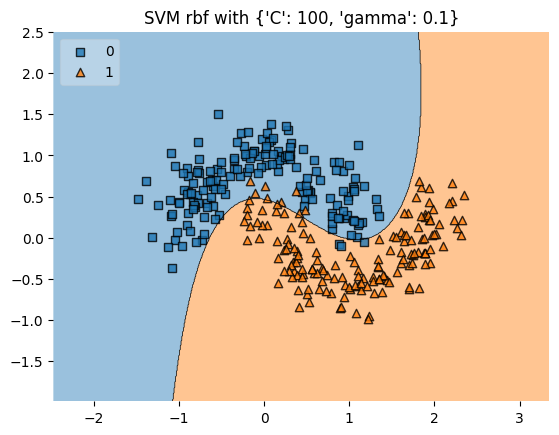

In [175]:
plot_decision_regions(X=X_train, y=y_train, clf=gs_svm_rbf, legend=2)
plt.title('SVM rbf' + f' with {gs_svm_rbf.best_params_}')
plt.show()

In [176]:
acc = accuracy_score(gs_svm_rbf.predict(X_test), y_test)
print(f'accuracy for SVM rbf : {acc}')

accuracy for SVM rbf : 0.96


In [211]:
param_sigmoid= {'C': [0.001,0.01,0.1,1,10,100], 'coef0': [0,0.5,1,2]}


gs_svm_sigmoid = GridSearchCV(svm_sigmoid, param_sigmoid)
gs_svm_sigmoid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='sigmoid', random_state=1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'coef0': [0, 0.5, 1, 2]})

In [212]:
print(f"Best: {gs_svm_sigmoid.best_score_} using {gs_svm_sigmoid.best_params_}")

Best: 0.8 using {'C': 0.01, 'coef0': 1}


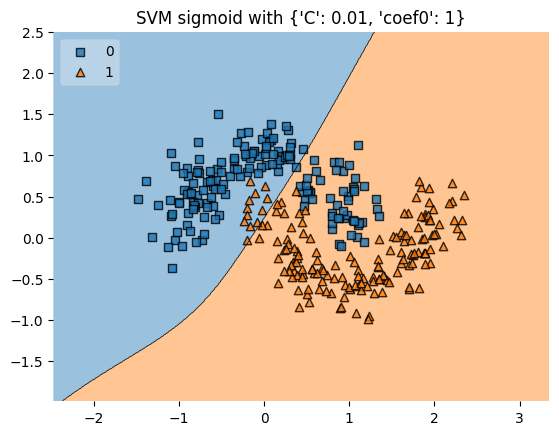

In [213]:
plot_decision_regions(X=X_train, y=y_train, clf=gs_svm_sigmoid, legend=2)
plt.title('SVM sigmoid' + f' with {gs_svm_sigmoid.best_params_}')
plt.show()

In [152]:
acc = accuracy_score(gs_svm_sigmoid.predict(X_test), y_test)
print(f'accuracy for SVM sigmoid : {acc}')

accuracy for SVM sigmoid : 0.7485714285714286


- What have happenned with classification quality?

The classification quality is increased for 'rbf' and 'poly' kernels. This is due to the fact that decision border is nonlinear in these cases.

- How did decision border changed for each kernel?

The decision border is changed according to the kernel function.

- What `degree` have you chosen and why?

`Degree` parameter is chosen with the help of `GridSearchSV` and is equal to __4__. This value is appropriate enough according to the data scatter plots.


## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [264]:
from sklearn.preprocessing import PolynomialFeatures

print('Shape of X_train before tranformation:', X_train.shape)
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
print('Shape of X_train after tranformation:', X_train_poly.shape)

Shape of X_train before tranformation: (325, 2)
Shape of X_train after tranformation: (325, 10)


In [265]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [266]:
svm = SVC(kernel='linear', C=10)
svm.fit(X_train_poly, y_train)

SVC(C=10, kernel='linear')

In [267]:
acc = accuracy_score(svm.predict(X_test_poly), y_test)
print(f'accuracy for SVM poly features : {acc}')

accuracy for SVM poly features : 0.9714285714285714


Now test for `PolynomialFeatures(4)`

In [268]:
poly = PolynomialFeatures(4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)
svm = SVC(kernel='linear', C=10)
svm.fit(X_train_poly, y_train)
acc = accuracy_score(svm.predict(X_test_poly), y_test)
print(f'accuracy for SVM poly features : {acc}')

accuracy for SVM poly features : 0.96


* Compare SVM's results with this solution (quality, borders type)

The Linear SVM with polynomial features works similar as SVM with polynomial kernel.
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

The polynomial degree in linear SVM with polynomial features is chosen to be __3__, but SVM with polynomial kernel works better with degree __4__. This may happen due to the fact that hyperparameter optimization was not performed for linear SVM with polynomial features.


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

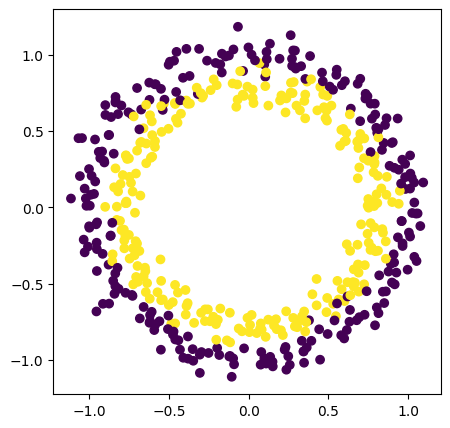

In [269]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

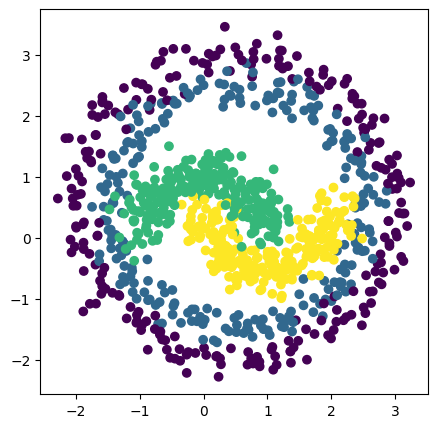

In [270]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [312]:
# rbf kernel does the work!!!!
svm = SVC(kernel='rbf', random_state=1)

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.35, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [313]:
param = {'C': [0.1,1, 10, 100], 'gamma': [0.01,0.1,0.01,0.001]}


gs_svm = GridSearchCV(svm, param_rbf)
gs_svm.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]})

In [314]:
print(f"Best: {gs_svm.best_score_} using {gs_svm.best_params_}")

Best: 0.9015384615384615 using {'C': 100, 'gamma': 0.1}


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


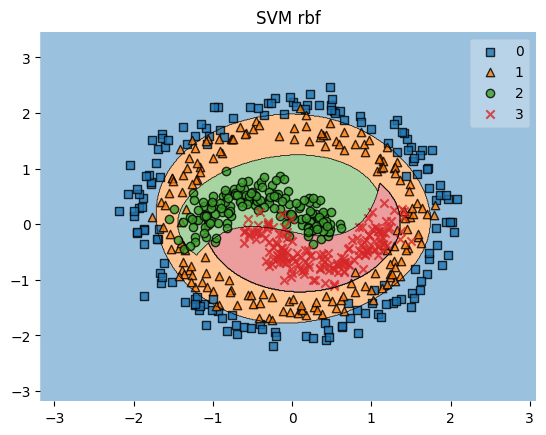

In [315]:
plot_decision_regions(X=X_train_scaled, y=y_train, clf=gs_svm, legend=1)
plt.title('SVM with radial basis')
plt.show()

In [316]:
acc = accuracy_score(gs_svm.predict(X_test_scaled), y_test)
print(f'accuracy : {acc}')

accuracy : 0.9085714285714286


The above plot and accuracy tests demonstrate that SVM with radial basis functions works and hyperparameters tuning solves this problem quiet well!